In [4]:
import numpy  as np
import pandas as pd 
df=pd.read_csv("ex3.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\ss884\AppData\Local\Temp\ipykernel_5056\623677970.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", center=0)


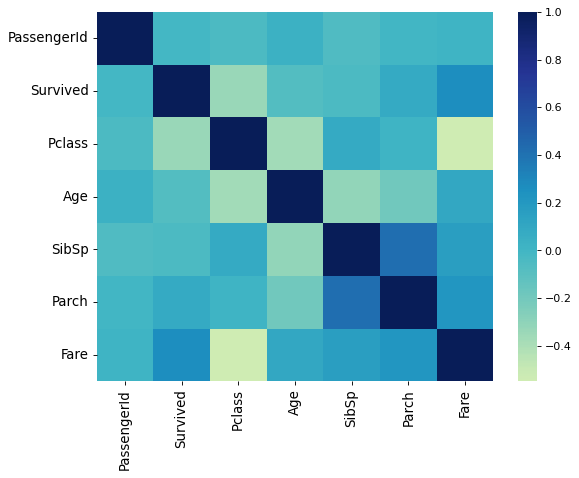

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6), dpi= 80)
sns.heatmap(df.corr(), cmap="YlGnBu", center=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [2]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [3]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le_Sex=LabelEncoder()


In [6]:
inputs ["Sex_"]=le_Sex.fit_transform(inputs['Sex'])
inputs.head()

,Pclass,Sex,Age,Fare,Sex_
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [7]:
inputs.drop('Sex', axis="columns",inplace=True)


In [8]:
inputs.head()

,Pclass,Age,Fare,Sex_
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [9]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs

,Pclass,Age,Fare,Sex_
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


C:\Users\ss884\AppData\Local\Temp\ipykernel_7296\623677970.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", center=0)


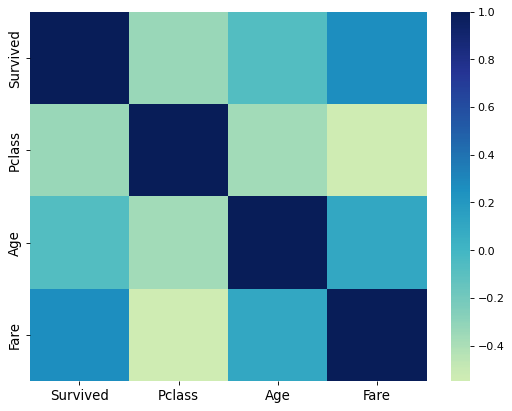

In [10]:
from sklearn.model_selection  import train_test_split
x_train,x_test ,y_train ,y_test=train_test_split(inputs,target,test_size=0.2)

In [16]:
y_test

714    0
445    1
18     0
386    0
335    0
      ..
104    0
272    1
474    0
101    0
489    1
Name: Survived, Length: 179, dtype: int64

In [11]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
model.score(x_test,y_test)

0.8268156424581006

In [16]:
import pickle

In [18]:
with open ('model_pickle','wb') as f:
    pickle.dump(model,f)

In [19]:
with open ('model_pickle','rb') as f:
    mp = pickle.load(f)

In [25]:
mp.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)